In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from prettytable import PrettyTable


#load predictions
labels=[]
preds=[]
dbfile = open('./knn-predictions/base-test-predictions-1575836051.143159.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('knn_base')
dbfile.close()
dbfile = open('./knn-predictions/basic-test-predictions-1575835928.691891.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('knn_basic')
dbfile.close()
dbfile = open('./knn-predictions/d2v-test-predictions-1575836012.216281.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('knn_d2v')
dbfile.close()

dbfile = open('./nn-final-models/base-test-predictions-1575835107.478405.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('nn_base')
dbfile.close()
dbfile = open('./nn-final-models/basicname-test-predictions-1575835107.478405.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('nn_basic')
dbfile.close()
dbfile = open('./nn-final-models/doc2vec-test-predictions-1575835107.478405.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('nn_d2v')
dbfile.close()

dbfile = open('./svm-predictions/base-test-predictions-1575838424.324989.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('svm_base')
dbfile.close()
dbfile = open('./svm-predictions/basic-test-predictions-1575835932.142707.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('svm_basic')
dbfile.close()

dbfile = open('./Figures/LogReg/BaseDataset/yhat_TEST_Base.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('LogReg_base')
dbfile.close()
dbfile = open('./Figures/LogReg/BasicNamesDataSet/yhat_TEST_BasicName.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('LogReg_basic')
dbfile.close()
dbfile = open('./Figures/LogReg/Doc2VecDataSet/yhat_TEST_Doc2Vec.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('LogReg_d2v')
dbfile.close()

dbfile = open('./Curry_Figs/Ada_Pred0', 'rb')
preds.append(pickle.load(dbfile))
labels.append('Ada_base')
dbfile.close()
dbfile = open('./Curry_Figs/Ada_Pred1', 'rb')
preds.append(pickle.load(dbfile))
labels.append('Ada_basic')
dbfile.close()
dbfile = open('./Curry_Figs/Ada_Pred2', 'rb')
preds.append(pickle.load(dbfile))
labels.append('Ada_d2v')
dbfile.close()

dbfile = open('./Curry_Figs/rfc_pred0', 'rb')
preds.append(pickle.load(dbfile))
labels.append('RFC_base')
dbfile.close()
dbfile = open('./Curry_Figs/rfc_pred1', 'rb')
preds.append(pickle.load(dbfile))
labels.append('RFC_basic')
dbfile.close()
dbfile = open('./Curry_Figs/rfc_pred2', 'rb')
preds.append(pickle.load(dbfile))
labels.append('RFC_d2v')
dbfile.close()

y_test=np.array(pd.read_csv("./data/preprocess-base-y-test.csv")['success'])

In [2]:
#correct differences in prediction data types
for i in range(len(preds)):
    preds[i]=preds[i].flatten()
    
for i in range(len(preds)):
    preds[i]=preds[i].tolist()
    
for i in range(len(preds)):
    if type(preds[i][0])!=type(True):
        for j in range(len(preds[0])):
            preds[i][j]=True if preds[i][j] >= .5 else False
preds=np.asarray(preds)

In [4]:
#find examples that are either always correctly or incorrectly predicted by all models
def allWrongPredictions(predictions,y_test,modelNames):
    all_faileds=[]
    for k in range(len(y_test)):
        all_failed=True
        for i in predictions:
            if i[k]==y_test[k]:
                all_failed=False
        if all_failed:
            all_faileds.append(k)
    return all_faileds
wrong=allWrongPredictions(preds,y_test,labels)

def allRightPredictions(predictions,y_test,modelNames):
    all_rights=[]
    for k in range(len(y_test)):
        all_right=True
        for i in predictions:
            if i[k]!=y_test[k]:
                all_right=False
        if all_right:
            all_rights.append(k)
    return all_rights
rights=allRightPredictions(preds,y_test,labels)

In [19]:
df.head(5)

,Unnamed: 0,main_category,category,duration,usd_goal_real,launched_month,deadline_month
0,0,13,67,-0.267523,0.642591,8.0,9.0
1,1,7,58,-0.877738,-0.037169,6.0,6.0
2,2,6,129,4.440430,-0.032646,9.0,0.0
3,3,6,40,-0.183799,-0.022676,1.0,2.0
4,4,10,90,-0.744063,-0.034459,1.0,2.0


-0.0371779238078841


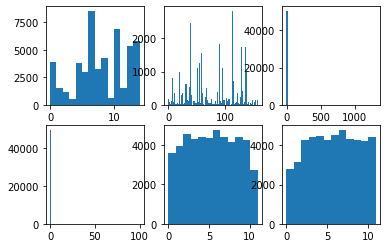

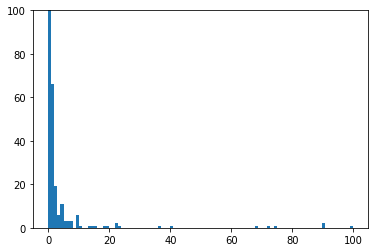

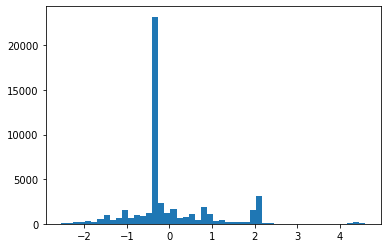

In [13]:
df=pd.read_csv("./data/preprocess-base-x-test.csv")
X_test = np.array(df)
#X_test[:,3]=X_test[:,3]/np.amax(X_test[:,3])
#X_test[:,4]=X_test[:,4]/np.amax(X_test[:,4])
loc = [1,2,3,4,5,6]
bins = [14,150,50,100,12,12]
fig,ax = plt.subplots(2,3)
i=0
for row in ax:
    for col in row:
        col.hist(X_test[:,loc[i]],bins=bins[i])
        i+=1

fig,ax = plt.subplots()
ax.hist(X_test[:,4],bins[3])
plt.ylim(0,100)

INDEX = np.asarray(X_test[:,3]<=100).nonzero()
fig,ax = plt.subplots()
ax.hist(X_test[INDEX[0],3],bins[2])
#plt.ylim(0,100)
        
print(np.amin(X_test[:,4]))

-0.037177026512662935


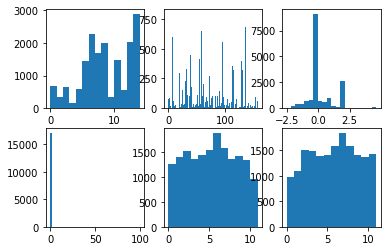

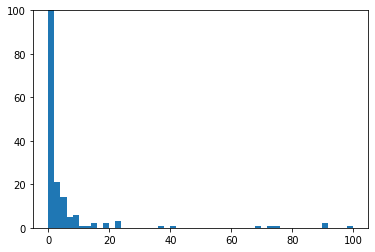

In [14]:
dfright=df.iloc[rights]
X_test_right = np.array(dfright)
#X_test[:,3]=X_test[:,3]/np.amax(X_test[:,3])
#X_test[:,4]=X_test[:,4]/np.amax(X_test[:,4])
loc = [1,2,3,4,5,6]
bins = [14,150,20,50,12,12]
fig,ax = plt.subplots(2,3)
i=0
for row in ax:
    for col in row:
        col.hist(X_test_right[:,loc[i]],bins=bins[i])
        i+=1
        
fig,ax = plt.subplots()
ax.hist(X_test_right[:,4],bins[3])
plt.ylim(0,100)
        
print(np.amin(X_test_right[:,4]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13db0a160>,
      dtype=object)

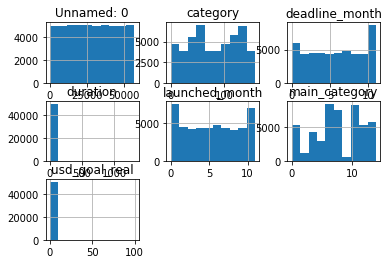

In [97]:
df.hist()

In [17]:
dfwrong=df.iloc[wrong]

-0.037177026512662935


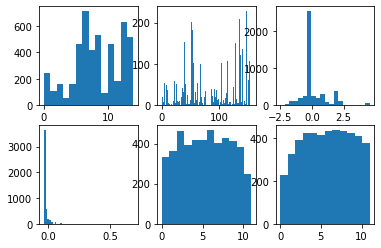

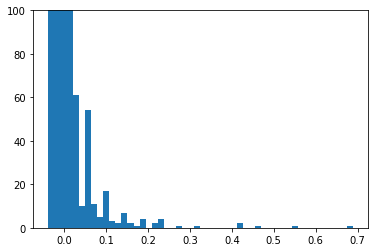

In [18]:
X_test_wrong = np.array(dfwrong)
#X_test[:,3]=X_test[:,3]/np.amax(X_test[:,3])
#X_test[:,4]=X_test[:,4]/np.amax(X_test[:,4])
loc = [1,2,3,4,5,6]
bins = [14,150,20,50,12,12]
fig,ax = plt.subplots(2,3)
i=0
for row in ax:
    for col in row:
        col.hist(X_test_wrong[:,loc[i]],bins=bins[i])
        i+=1

fig,ax = plt.subplots()
ax.hist(X_test_wrong[:,4],bins[3])
plt.ylim(0,100)

print(np.amin(X_test_wrong[:,4]))

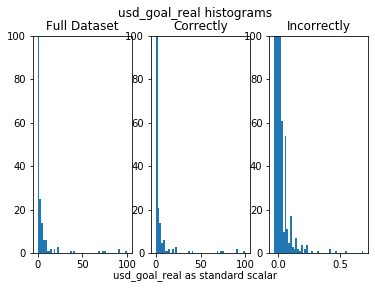

In [41]:
fig,[ax1,ax2,ax3] = plt.subplots(1,3)
ax1.hist(X_test[:,4],bins[3])
ax1.set_title("Full Dataset")
ax1.set_ylim(0,100)
ax2.hist(X_test_right[:,4],bins[3])
ax2.set_title("Correctly")
ax2.set_ylim(0,100)
ax3.hist(X_test_wrong[:,4],bins[3])
ax3.set_title("Incorrectly")
ax3.set_ylim(0,100)
fig.suptitle("usd_goal_real histograms")
fig.text(0.5, 0.04, 'usd_goal_real as standard scalar', ha='center')
plt.savefig(r"/Users/glinn/Documents/CSCI5622-machine-learning/project/csci5622project/Figures/ErrorAnalysis")

In [42]:
dfwrong.iloc[0]

Unnamed: 0        24.000000
main_category      9.000000
category          77.000000
duration           2.086260
usd_goal_real     -0.034459
launched_month     3.000000
deadline_month     5.000000
Name: 20, dtype: float64

In [ ]:
c